In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
df_gene = pd.read_csv("gene.csv")
df_meta = pd.read_csv('meta-data.csv')

x = df_gene

/home/deepak/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
x.head()

,Unnamed: 0,symbol,S1,S2,S3,S4,S5,S6,S7,S8,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,1,Zzz3,253.401685,402.8508776,230.957463,688.486264,358.067836,344.962350,441.155001,301.149694,...,507.882774,465.081486,415.478767,297.061149,488.848114,367.912141,307.199908,347.802509,411.227261,283.709694
1,2,Zzef1,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
2,3,Zyx,40.578958,49.23516006,59.472005,46.212152,61.969671,55.732843,53.819870,54.315691,...,33.512262,36.751853,36.952457,35.718610,27.346198,32.647887,42.006833,32.324596,41.426033,32.754971
3,4,Zyg11b,26.373102,35.00190057,32.389728,34.932372,35.192365,33.858459,27.948378,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
4,5,Zyg11a,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797


In [4]:
for column in x.columns:
    if x[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        x[column] = le.fit_transform(x[column].astype(str))

In [11]:
x.to_csv('new.csv')

In [5]:
# DATA CLEANING

# fill S21 null value with mean.
x = x.fillna(x['S21'].mean())

#drop symbol and serial no. 
x = x.drop(['symbol', 'Unnamed: 0'], axis=1)

In [6]:
#Scale the DATA
scaled_data = preprocessing.scale(x.T)

# create PCA
pca = PCA()

#fit scaled data
pca.fit(scaled_data) 

# Transform on Principal Components
pca_data = pca.transform(scaled_data) 

# PCA TRANSFORMED DATA SHAPE
pca_data.shape

(30, 30)

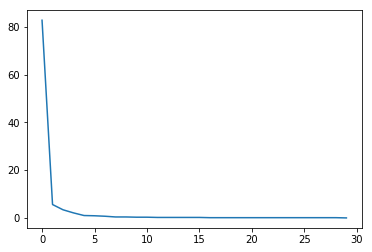

In [7]:
var1 = np.round(pca.explained_variance_ratio_* 100, decimals=1)

plt.plot(var1)

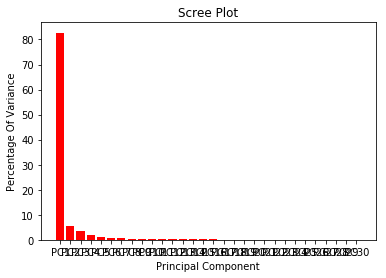

In [8]:
#The following code constructs the Scree plot
labels = ['PC' + str(x) for x in range(1, len(var1)+1)]
 
plt.bar(x=range(1,len(var1)+1), height=var1, tick_label=labels, color = "red")
plt.ylabel('Percentage Of Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

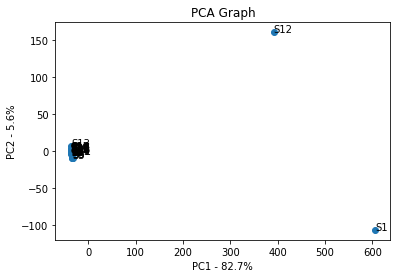

In [9]:
# Now, draw the PC1 and PC2 axis graph
pca_df = pd.DataFrame(pca_data, index=['S' + str(x) for x in range(30)], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(var1[0]))
plt.ylabel('PC2 - {0}%'.format(var1[1]))
 
for i in pca_df.index:
    plt.annotate(i, (pca_df.PC1.loc[i], pca_df.PC2.loc[i]))
 
plt.show()

# Meta Data File

Text(0,0.5,'Sample')

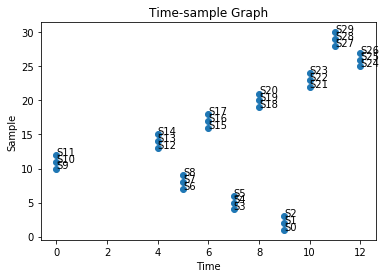

In [34]:
x1 = np.arange(1, 31)

plt.scatter(df_meta.Time, x1)

for i in range(30):
    plt.annotate('S' + str(i), ((df_meta.Time)[i], x1[i]))


plt.title('Time-sample Graph')
plt.xlabel('Time')
plt.ylabel('Sample')